In [1]:
#Stat 131 Project - Group - Big Baller Data
#Donald Vu - Ammar Banatwala - Austyn Yamada

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
fifa=pd.read_csv("FIFA18v2.csv")

In [4]:
rng=list(range(5,7))+ list(range(11,len(fifa.columns)))
attributes=fifa.iloc[:,rng]
print(attributes.head(10))

   Overall  Potential  Special  Acceleration  Aggression  Agility  Balance  \
0       94         94     2161            92          48       90       95   
1       94         94     2228            89          63       89       63   
2       92         93     2105            94          56       96       82   
3       92         92     2321            88          87       86       78   
4       92         92     1487            56          29       51       35   
5       91         93     1465            57          38       60       43   
6       91         92     2234            78          73       82       79   
7       91         91     2151            79          80       78       80   
8       91         91     2122            93          54       93       93   
9       90         90     2189            65          60       71       71   

   Ball Control  Composure  Crossing   ...     Reactions  Short Passing  \
0            96         97        77   ...            95          

In [5]:
#subsetted the dataframe into only attributes
#Want to investigate what attributes contribute the most to the Overall rating number

In [6]:
corr = attributes.corr()
print(corr.head(10))

               Overall  Potential   Special  Acceleration  Aggression  \
Overall       1.000000   0.659854  0.604461      0.210802    0.402394   
Potential     0.659854   1.000000  0.383647      0.249293    0.177117   
Special       0.604461   0.383647  1.000000      0.661534    0.674660   
Acceleration  0.210802   0.249293  0.661534      1.000000    0.271539   
Aggression    0.402394   0.177117  0.674660      0.271539    1.000000   
Agility       0.282520   0.233085  0.701772      0.807770    0.250429   
Balance       0.108558   0.139218  0.590814      0.708118    0.198593   
Ball Control  0.449298   0.346633  0.908088      0.688719    0.549303   
Composure     0.633664   0.385337  0.808071      0.444177    0.590764   
Crossing      0.390835   0.242603  0.865236      0.673005    0.476573   

               Agility   Balance  Ball Control  Composure  Crossing    ...     \
Overall       0.282520  0.108558      0.449298   0.633664  0.390835    ...      
Potential     0.233085  0.139218  

In [7]:
#Created a correlation matrix between all the attributes

In [24]:
by_att=corr.groupby(corr.columns)
overallcorr=by_att['Overall'].sum()
print(overallcorr.head(10))

Acceleration        0.210802
Aggression          0.402394
Agility             0.282520
Balance             0.108558
Ball Control        0.449298
Composure           0.633664
Crossing            0.390835
Curve               0.413601
Dribbling           0.362416
FK Accuracy         0.389572
Finishing           0.321442
GK Diving          -0.029090
GK Handling        -0.028508
GK Kicking         -0.033780
GK Positioning     -0.020707
GK Reflexes        -0.028472
Heading Accuracy    0.343355
Interceptions       0.327370
Jumping             0.287358
Long Passing        0.476248
Long Shots          0.413652
Marking             0.247823
Overall             1.000000
Penalties           0.333620
Positioning         0.353379
Potential           0.659854
Reactions           0.840602
Short Passing       0.491155
Shot Power          0.431744
Sliding Tackle      0.225528
Special             0.604461
Sprint Speed        0.228826
Stamina             0.368350
Standing Tackle     0.256177
Strength      

In [9]:
#Only concerned with which variables correlate highly with the Overall variable

In [10]:
highcorr=by_att.filter(lambda g:g['Overall'].abs().sum() >.60)
highcorrmatrix=corr.loc[['Overall','Potential','Special','Composure','Reactions'],['Overall','Potential','Special','Composure','Reactions']]
print(highcorrmatrix)

            Overall  Potential   Special  Composure  Reactions
Overall    1.000000   0.659854  0.604461   0.633664   0.840602
Potential  0.659854   1.000000  0.383647   0.385337   0.505027
Special    0.604461   0.383647  1.000000   0.808071   0.590272
Composure  0.633664   0.385337  0.808071   1.000000   0.602478
Reactions  0.840602   0.505027  0.590272   0.602478   1.000000


In [11]:
#Only 4 predictors have a correlation above .60 with Overall
#Potential, Special, Composure, Reactions

In [12]:
highcorrdata=attributes.loc[:,['Overall','Potential','Special','Composure','Reactions']]
print(highcorrdata.head(10))


   Overall  Potential  Special  Composure  Reactions
0       94         94     2161         97         95
1       94         94     2228         95         96
2       92         93     2105         92         88
3       92         92     2321         85         93
4       92         92     1487         70         85
5       91         93     1465         64         90
6       91         92     2234         86         90
7       91         91     2151         87         91
8       91         91     2122         89         87
9       90         90     2189         85         89


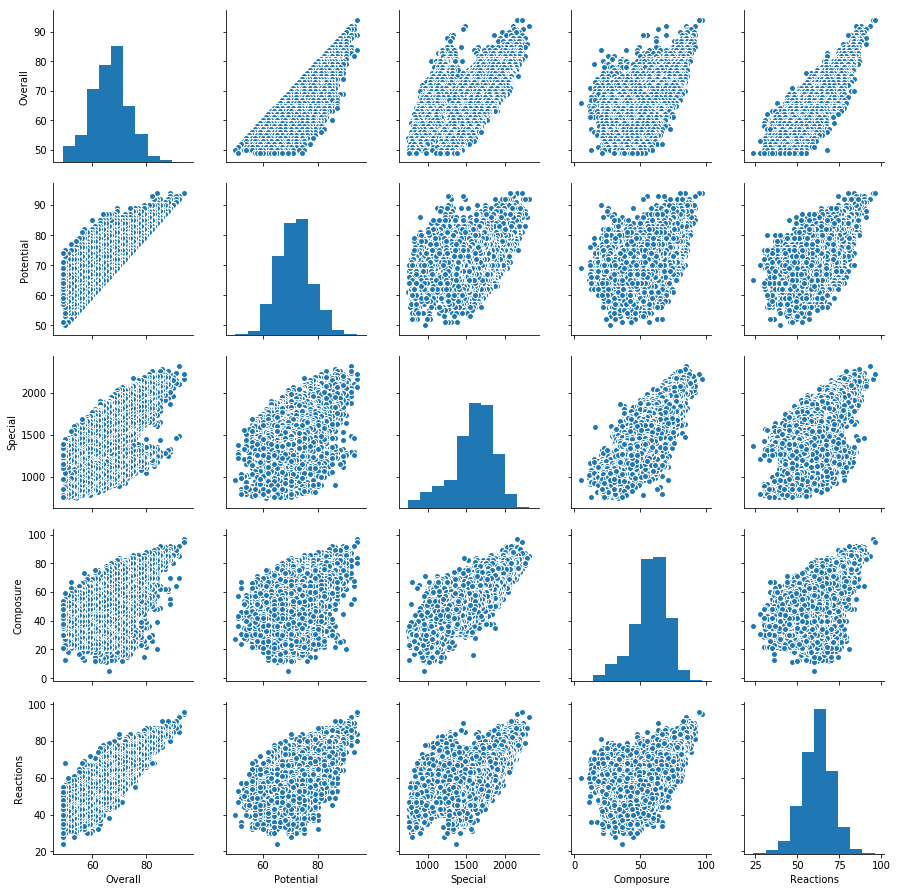

In [13]:
sns.pairplot(highcorrdata)

In [14]:
#Created a pairplot to visually see how each of these predictors are related
#Everything is positively correlated

In [15]:
highcorrmatrix.style.background_gradient()

,Overall,Potential,Special,Composure,Reactions
Overall,1,0.659854,0.604461,0.633664,0.840602
Potential,0.659854,1,0.383647,0.385337,0.505027
Special,0.604461,0.383647,1,0.808071,0.590272
Composure,0.633664,0.385337,0.808071,1,0.602478
Reactions,0.840602,0.505027,0.590272,0.602478,1


In [16]:
#Also created a heatmap with the correlation numbers
#Aside from Overall, Reactions is also a strong trait that seems to linearly increase with the other attributes really well.

In [17]:
by_club=fifa.groupby('Club')
aggregatorw={'Wage':'mean'}
aggclubw=by_club.agg(aggregatorw)
topavgw=aggclubw.sort_values(by=['Wage'],ascending=False)
top5avgoverallw=topavgw.iloc[0:5,]
top5avgoverallw.columns=['Avg. Wage']
print(top5avgoverallw)

                       Avg. Wage
Club                            
FC Barcelona       208454.545455
Real Madrid CF     147848.484848
Juventus           126600.000000
Manchester City    110000.000000
Manchester United  104000.000000


In [18]:
#Lets see if money correlates with skill by comparing these 5 teams to the top 5 average Overall rating
#The table above depicts the top 5 teams that have the highest average player wage.

In [19]:
aggregator={'Overall':'mean'}
aggclub=by_club.agg(aggregator)
topavg=aggclub.sort_values(by=['Overall'],ascending=False)
top5avgoverall=topavg.iloc[0:5,]
top5avgoverall.columns=['Avg. Overall']
print(top5avgoverall)

                Avg. Overall
Club                        
FC Barcelona       83.454545
Juventus           82.040000
Napoli             78.600000
Inter              77.565217
Real Madrid CF     77.272727


In [20]:
#Looks like FC Barcelona, Juventus, and Real Madrid CF are doing well for themselves
#They are 3 out of the 5 top wage teams that are getting their moneys worth since they also made the top 5 average Overall rating
#Both Manchester teams need to rethink their roster and be more careful with handing out large contracts

In [21]:
by_club=fifa.loc[:,['Club','Name','Overall']]
by5club=by_club[by_club.Club.isin(['FC Barcelona', 'Juventus', 'Napoli', 'Inter', 'Real Madrid CF'])]
by5club=by5club.sort_values(by=['Club']).reset_index()
print(by5club.head(10))

   index          Club          Name  Overall
0      0  FC Barcelona      L. Messi       94
1     64  FC Barcelona    I. Rakitić       86
2    218  FC Barcelona   André Gomes       82
3    390  FC Barcelona       Y. Mina       80
4    594  FC Barcelona      L. Digne       79
5     51  FC Barcelona       Iniesta       87
6     49  FC Barcelona         Piqué       87
7    595  FC Barcelona  Paco Alcácer       79
8   3871  FC Barcelona  Sergi Samper       72
9     41  FC Barcelona      Coutinho       87


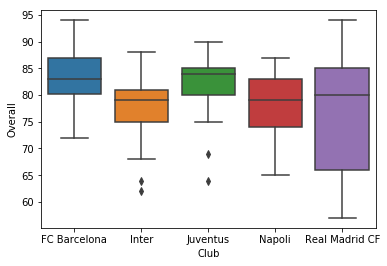

In [22]:
sns.boxplot(x='Club', y="Overall", data=by5club)

In [23]:
#Created a boxplot of the top 5 average Overall rating teams to visualize the distribution of skill on each team
#There seems to be a lot of variance within Real Madrid but it is apparent that their top players can match up with the best of any other team.

In [48]:
a=fifa.groupby('Club')['Overall'].mean()
b=pd.DataFrame({'Club':a.index,
                'AvgOverall':a})
c=b.sort_values(by=['AvgOverall'],ascending=False)
d=(c.to_string(index=False))
print(d)

AvgOverall                               Club
                                             
 83.454545                       FC Barcelona
 82.040000                           Juventus
 78.600000                             Napoli
 77.565217                              Inter
 77.272727                     Real Madrid CF
 77.115385                         Sevilla FC
 76.555556                               Roma
 76.531250                   FC Bayern Munich
 76.500000                  Manchester United
 76.433333                           FC Porto
 76.400000                Paris Saint-Germain
 76.080000                              Milan
 75.720000                Bayer 04 Leverkusen
 75.645161                        Sporting CP
 75.560000                        Beşiktaş JK
 75.545455                            Chelsea
 75.296296                      FC Schalke 04
 75.121212                    Manchester City
 75.032258                              Lazio
 74.906250                  Boruss

In [ ]:
# Calculate the year in which there was maximum enrollment of women in Computer Science: yr_max
yr_max = year[computer_science.argmax()]

#2d his
# Generate a 2-D histogram
plt.hist2d(hp,mpg,bins=(20,20),range=((40,235),(8,48)))

# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hist2d() plot')
plt.show()

In [ ]:
#reg plots, making scatter plot separate than adding in two diff reg lines of diff order
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto['mpg'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, color='blue', scatter=None, label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight',y='mpg',data=auto,color='green',scatter=None,label='order 2',order=2)

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()



In [ ]:
regplot with 3rd var as stratifier
sns.lmplot(x='weight',y='hp',data=auto,hue='origin',palette='Set1')


In [ ]:
#to make 3 separate plots on top of each other
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(y='hp',x='weight',data=auto,hue='origin',row='origin')


In [ ]:
#dope joint plot
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='hex')

# Display the plot
plt.show()


In [ ]:
#swag to pairwise with reg line
sns.pairplot(auto, hue='origin', kind='reg')